<a href="https://colab.research.google.com/github/Urbanus-Kathitu/linkedin-skill-assessments-quizzes/blob/main/2022__Project_Financial_Inclusion_Moringa_Data_Science_Core_Week_7_Independant__Project_Urbanus_Kathitu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Defining the Question**

# a) **Understanding the Contect**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

# b) **Research Question**

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.
In order to work on the above problem, you need to do the following:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question.  
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform **univariate**, **bivariate** and **multivariate** analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements

# c) **Define the Data Analytic Question** 

Predict which individuals are most likely to have or use a bank account

# d) **Recordning the Experiments Design**

* Reading the Data
* Checking the Data
* Data Cleaning
* Performing Exploritary Data Analysis
* Challenge the solution
* Follow questions
* Offer Recomendations

# **Reading the Data** 

Importing the Libraries


In [ ]:
#First we will import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the Dataset to be used along with the descriptions of each column.

Preview the dataset and obtain information on the datatypes of the columns.

In [ ]:
#loading and viewing variable definitions dataset

url = "http://bit.ly/VariableDefinitions"
vb_data = pd.read_csv(url)
vb_data

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
# Lets Load the Dataset from the source
data = pd.read_csv("http://bit.ly/FinancialDataset")

data.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# **Checking Your Data**

In [ ]:
# Display the head of the data set as preocedure requires
#Preview the Head part of the data
data.head(5)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Preview the tail part of the data
data.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Determine the number of records in our dataset
data.shape


(23524, 13)

In [ ]:
# Lets get the names of the columns in the data
data.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# We can check if each column has the appropriate datatype
data.dtypes


country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

Here we can conclude that most of our data is of object type.
The column year is int64. 
Household size and age are both float64 data type.

In [ ]:
# Check the details of the Dataset(mode,median,mean)
data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# **External Data Source Validation**

FinAccess Kenya 2018: https://fsdkenya.org/publication/finaccess2019/

Finscope Rwanda 2016: http://www.statistics.gov.rw/publication/finscope-rwanda-2016

Finscope Tanzania 2017: http://www.fsdt.or.tz/finscope/

Finscope Uganda 2018: http://fsduganda.or.ug/finscope-2018-survey-report/

External data helps verify quality information concerning the dataset 




# **Data Cleaning**


In [ ]:
#Check for null values in the data
data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

The dataset had missing entries therefore we drop the rows with missing values 

In [ ]:
#Propagate the null values forward
data.dropna(inplace= True)

In [ ]:
#Check for any null values  
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
data.shape

(23343, 13)

In [ ]:
#Check for duplicates in the data
data.duplicated().sum()

0

There are no duplicates in this Dataset

**Check for outliers and anomalies within the dataset.**

In [ ]:
#Find out how many outliers are in the dataset
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

#Calculate the Interquantile Range
IQR = q3-q1
print(IQR)
print("*"*100)

#Find the low bound
(q1 - 1.5 * IQR)

#Find the upper bound
(q3 - 1.5 * IQR)

#(data < (q1 - 1.5 * IQR)) |(data > (q3 + 1.5 * IQR))
print((data < (q1 - 1.5 * IQR)).sum())
print((data > (q3 + 1.5 * IQR)).sum())


year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64
****************************************************************************************************
Cell Phone Access         0
Has a Bank account        0
Level of Educuation       0
Respondent Age            0
The relathip with head    0
Type of Job               0
Type of Location          0
country                   0
gender_of_respondent      0
household_size            0
marital_status            0
uniqueid                  0
year                      0
dtype: int64
Cell Phone Access           0
Has a Bank account          0
Level of Educuation         0
Respondent Age            239
The relathip with head      0
Type of Job                 0
Type of Location            0
country                     0
gender_of_respondent        0
household_size            376
marital_status              0
uniqueid                    0
year                        3
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


* The IQR range for year is 2 years with a total of 3 years being outliers.
* The IQR range for household size is 3 with a total of 376 household_size being outliers.
* The IQR range for respondemts age is 23 years with a total of 239 respondant_age years being outliers.

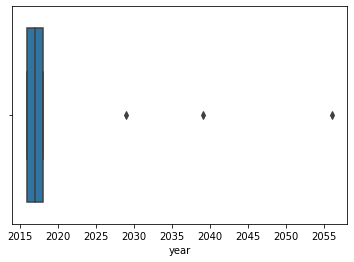

In [ ]:
#Check for Outliers in the year column 
sns.boxplot(x=data['year'])


* There are 3 points shown outside the boxplot which are outliers

**Lets try to remove the outliers in the year column**

In [ ]:
#Remove outliers in the year column
outliers = data[data['year'] > 2018].index
data.drop(outliers , inplace=True)
data.shape

(23340, 13)

After removing the outliers in the year column

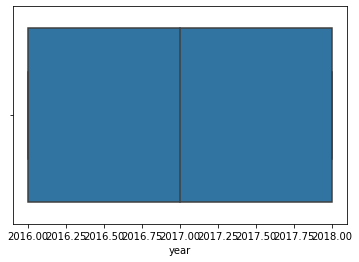

In [ ]:
sns.boxplot(x=data['year'])

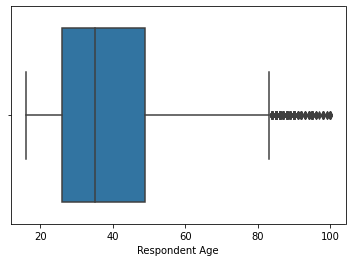

In [ ]:
#Check for outliers in the column Respondent Age
sns.boxplot(x=data['Respondent Age'])


* From the above graph, there are a number of outliers for ages between 84 to 100

In [ ]:
#Drop age of respondent outliers
data_1 = data[data['Respondent Age']<82]
data_1.shape

(23028, 13)

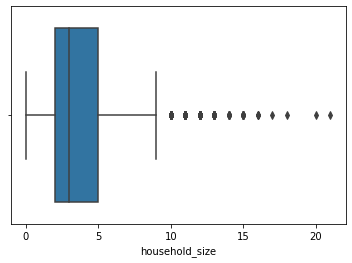

In [ ]:
#Check for outliers in the household size column
sns.boxplot(x=data['household_size'])


* From the readings above we can colclude that their are a few families with a household. 


In [ ]:
#Drop household size outliers
data_2 =data[data['household_size']<10]
data_2.shape

(22964, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


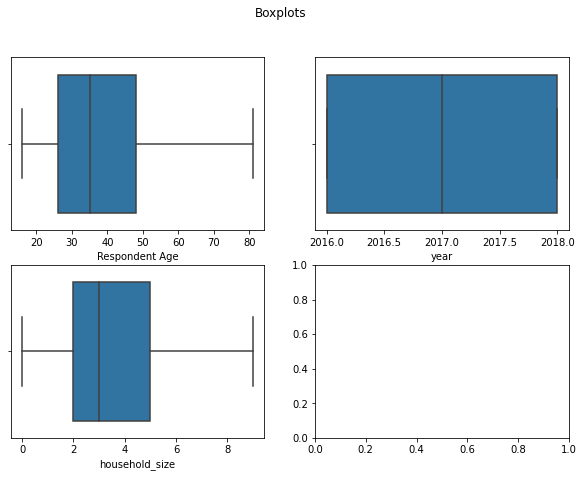

In [ ]:
#Plot the final boxplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(data_1['Respondent Age'], ax=ax1)
sns.boxplot(data['year'], ax=ax2)
sns.boxplot(data_2['household_size'], ax=ax3)

plt.show()

In [ ]:
# Check for anomalies
data['Respondent Age'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [ ]:
# Check for anomalies
data['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21.,  0., 18., 17., 20.])

In [ ]:
# Check for anomalies
data['year'].unique()

array([2018, 2016, 2017])

In [ ]:
#Removing the outliers using percentile for household_size
max_threshold = data['household_size'].quantile(0.95)
print(max_threshold)
data1 = data[data['household_size']<= max_threshold]
print(data1.shape)
print(data1.describe())
print(data1['household_size'].unique())

8.0
(22610, 13)
               year  household_size  Respondent Age
count  22610.000000    22610.000000    22610.000000
mean    2016.966387        3.481690       38.901681
std        0.843718        1.980989       16.565513
min     2016.000000        0.000000       16.000000
25%     2016.000000        2.000000       26.000000
50%     2017.000000        3.000000       35.000000
75%     2018.000000        5.000000       49.000000
max     2018.000000        8.000000      100.000000
[3. 5. 8. 7. 1. 6. 4. 2. 0.]


In [ ]:
#Rename the columns and correct spellings
data1.rename(columns={'Has a Bank account':'Bank account','Level of Educuation':'Education', 'Cell Phone Access':'Mobile Phone',
                      'gender_of_respondent':'Gender', 'Respondant Age': 'Age','country':'Country',
'Type of Location':'Location', 'Type of Job':'Job Title'},inplace=True)
data1.columns
data1.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,year,uniqueid,Bank account,Location,Mobile Phone,household_size,Respondent Age,Gender,The relathip with head,marital_status,Education,Job Title
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
#Drop unnecessary columns we do not intend to use in the dataset
data = data.drop(['The relathip with head', 'marital_status'], axis = 1)
print(data.columns)

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'Level of Educuation', 'Type of Job'],
      dtype='object')


# **Exploratory Data Analysis.**

 # **a) Univariate Data Analysis.**





Numerical variables 
We will be checking the following properties:

Mean, Median, Standard Deviation, Kurtosis and skewness distribution/range.

##**Numerical Variables** 

###i. Household Variable


**Mode**

In [ ]:
data['household_size'].mode()

0    2.0
dtype: float64

**Mean**

In [ ]:
data['household_size'].mean()

3.688560411311054

**Median**

In [ ]:
data['household_size'].median()

3.0

**Range**

In [ ]:
d = data['household_size'].max()
e = data['household_size'].min()

f = d-e
print('The range of the household_sizes is', f)

The range of the household_sizes is 21.0


**Standard Deviation**

In [ ]:
print(data['household_size'].std())

2.2812745975348365


**Variane**

In [ ]:
print(data['household_size'].var())

5.20421378935773


**Kurtosis**

In [ ]:
print(data['household_size'].kurt())

1.1538357462528523


**Skewness**

In [ ]:
print(data['household_size'].skew())

0.9741827150450616


**Interquartile Range**

In [ ]:
quantile_size = data["household_size"].quantile([0.25,0.5,0.75])
print(quantile_size)

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


In [ ]:
# Find The Interquartile Range = IQR
Q3 = data['household_size'].quantile(0.75)
Q2 = data['household_size'].quantile(0.25)
IQR= Q3-Q2
print('The IQR for the respondents age is', IQR)

The IQR for the respondents age is 3.0


**Plotting Graphs**

This distribution below has skew 0.9741827150450616
This distribution below has kurtosis 1.1538357462528523


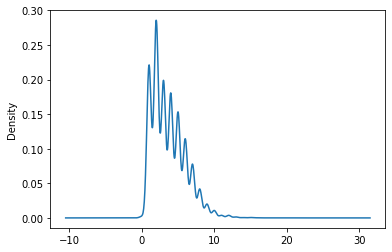

In [ ]:
#Lets plot a graph to show the distribution of skewness and kurtosis in the household_size

data['household_size'].plot(kind='density')
print('This distribution below has skew', data['household_size'].skew())
print('This distribution below has kurtosis', data['household_size'].kurt())

This is a positive skew because  the data leans more towards the right.


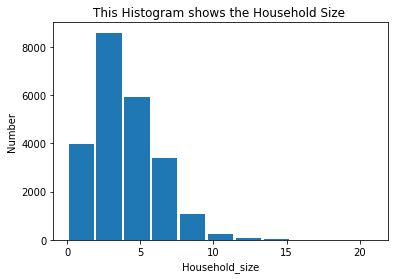

In [ ]:
#Lets plot a histogram for the household_size

data1 =data['household_size']
plt.hist(data1, bins=11, histtype='bar', rwidth=0.9)

plt.xlabel('Household_size')
plt.ylabel('Number')
plt.title('This Histogram shows the Household Size ') 
plt.show()

Majority of the households accomodate between 1 to 5 people with 3 or 4 people being the most in a single household

### ii. Age Variable


**Mode**

In [ ]:
data['Respondent Age'].mode()

0    30.0
dtype: float64

**Mean**

In [ ]:
data['Respondent Age'].mean()

38.80706940874036

**Median**

In [ ]:
data['Respondent Age'].median()

35.0

**Range**

In [ ]:
a = data['Respondent Age'].max()
b = data['Respondent Age'].min()

c = a-b
print('The range of the age for the respondents is', c)

The range of the age for the respondents is 84.0


**Standard Deviation**

In [ ]:
print(data['Respondent Age'].std())

16.519904564514515


**Variane**

In [ ]:
print(data['Respondent Age'].var())

272.90724682066747


**Kurtosis** 

In [ ]:
print(data['Respondent Age'].skew())

0.8406145812311228


**Skewness**

In [ ]:
print(data['Respondent Age'].kurt())

0.09826807013177241


**Interquantile Range**

In [ ]:
quantile_size = data["Respondent Age"].quantile([0.25,0.5,0.75])
print(quantile_size)

0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64


In [ ]:
#Finding The Interquartile Range = IQR
q3 = data['Respondent Age'].quantile(0.75)
q2 = data['Respondent Age'].quantile(0.25)
iqr = q3-q2
print('The IQR for household sizes is', iqr)

The IQR for household sizes is 23.0


**Plotting Graphs**

The distribution below has skew 0.8406145812311228
The distribution below has kurtosis 0.09826807013177241


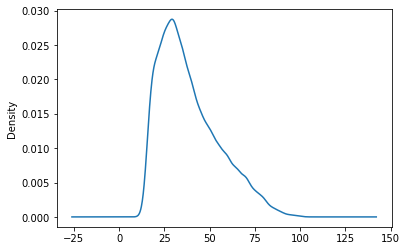

In [ ]:
#Lets plot a graph to show the distribution of skewness and kurtosis in the Respondant age
data['Respondent Age'].plot(kind='density')
print('The distribution below has skew', data['Respondent Age'].skew())
print('The distribution below has kurtosis', data['Respondent Age'].kurt())

The graphs is skewed towards the right. This means more data has been  spread towards the right.

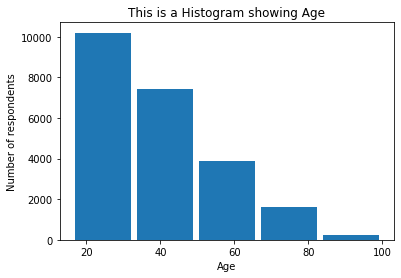

In [ ]:
#Lets plot a histogram for the Respondents Age
data1 =data['Respondent Age']
plt.hist(data1, bins=5, histtype='bar', rwidth=0.9)

plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.title('This is a Histogram showing Age') 
plt.show()

##**Categorical Variables**

###i. Country

In [ ]:
country=data['country'].value_counts()
print(country)


Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64


Text(0.5, 1.0, 'This is a distribution of the respondents by Country')

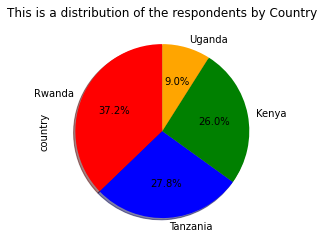

In [ ]:
#Plot the pie chart
colors=['red','blue','green','orange']
country.plot(kind='pie',colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('This is a distribution of the respondents by Country')

There where more repondants who were likely to have or use a bank account in Rwanda compared to Kenya, Tanzania and Uganda

###ii. Bank Account

Text(0.5, 1.0, 'availability of bank accounts')

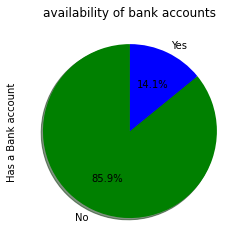

In [ ]:
#The number of people with bank accounts
Bank_acc =data['Has a Bank account'].value_counts()

#Plot the pie chart
colors=['green', 'blue']
Bank_acc.plot(kind='pie',colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('availability of bank accounts')

* Majority of the respondants do not have a access or are likely to use a bank account with only 14.1% being able to access or have one.
* This is extreamly low

In [ ]:
data['Has a Bank account'].value_counts()

No     20044
Yes     3296
Name: Has a Bank account, dtype: int64

###iii. Cell Phone Access

Text(0.5, 1.0, 'People with Mobile phone access')

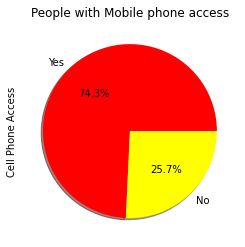

In [ ]:
#People with Mobile access
cell_1 =data['Cell Phone Access'].value_counts()

# Plotting the pie chart
colors=['red','yellow']
cell_1.plot(kind='pie',colors=colors,autopct='%1.1f%%',shadow=True,startangle=0)
plt.title('People with Mobile phone access')

* Despite the number of people with access to a bank account is low, the number of respondants in both urban and rural areas with Cell phone access is high fallin at 74.3%.


In [ ]:
data['Cell Phone Access'].value_counts()

Yes    17331
No      6009
Name: Cell Phone Access, dtype: int64

###iv. Gender

Text(0.5, 1.0, 'Gender distribution')

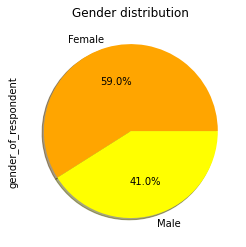

In [ ]:
#The number of Males and Femailes with Bank accounts
Gender_1 =data['gender_of_respondent'].value_counts()

# Plotting the pie chart
colors=['orange','yellow']
Gender_1.plot(kind='pie',colors=colors,autopct='%1.1f%%',shadow=True,startangle=0)
plt.title('Gender distribution')

* The gender distribution shows that there were more female respondants in the survey compared to male respondants. 


In [ ]:
data['gender_of_respondent'].value_counts()

Female    13766
Male       9574
Name: gender_of_respondent, dtype: int64

**Conclusion**

* Majority of the data was collected from Rwanda.
* There are  20044 without bank accounts and only 3296 with bank accounts.
* There are more people with mobile phone access which should be the main channel for information and awareness of bank accessories.

 # **b) Bivariate Data Analysis.**


Bivariate analysis, checks relationships and differences between two variables.
We will start with Numeric-Numeric variables, then Categorical-Categorical and lastly Categorical-Numeric variables.

 I want to predict the likelihood of the respondents using the bank, therefore I will be comparing most of my variables against the bank account column.

In [ ]:
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


##**Numerical vs Numerical**

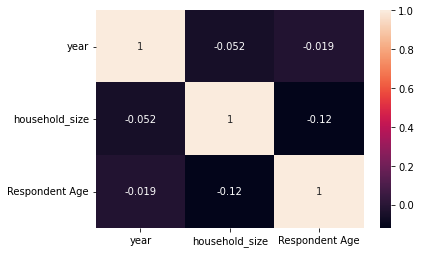

In [ ]:
#Calculating the Correlation
#Plot a correlation Heat Map

sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
data.corr()

,year,household_size,Respondent Age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
Respondent Age,-0.018554,-0.119671,1.000000


* Possible weak correlation between household size and age of respondents
*  This indicates that, although both variables tend to go up in response to one another, the relationship is not very strong.

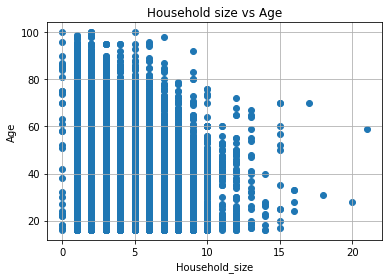

In [ ]:
#Plot a scatter plots of household_size against Respondent age
plt.scatter(data['household_size'] , data['Respondent Age'])
plt.title('Household size vs Age')
plt.xlabel('Household_size')
plt.ylabel('Age')
plt.grid()
plt.show()

##**Categorical vs Categorical**

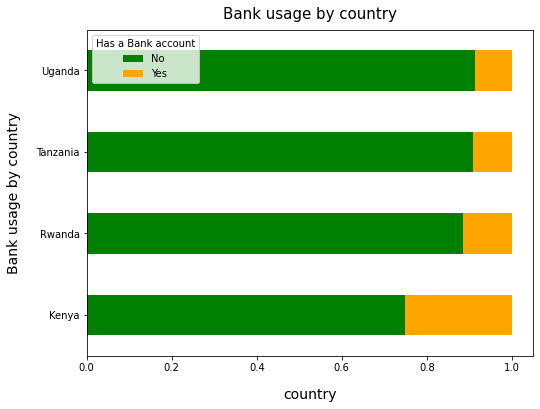

In [ ]:
#Lets group the Number of bank users by country.
country1 = data.groupby('country')['Has a Bank account'].value_counts(normalize=True).unstack()

colors= ['green', 'orange']

country1.plot(kind='barh', figsize=(8, 6), color=colors, stacked=True)
plt.title('Bank usage by country', fontsize=15, y=1.015)
plt.xlabel('country', fontsize=14, labelpad=15)
plt.xticks(rotation = 360)
plt.ylabel('Bank usage by country', fontsize=14, labelpad=15)
plt.show()

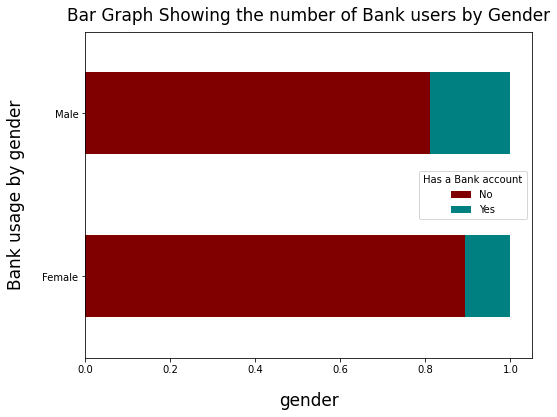

In [ ]:
gen = data.groupby('gender_of_respondent')['Has a Bank account'].value_counts(normalize=True).unstack()

colors= ['maroon', 'teal']

gen.plot(kind='barh', figsize=(8, 6), color=colors, stacked=True)
plt.title('Bar Graph Showing the number of Bank users by Gender', fontsize=17, y=1.015)
plt.xlabel('gender', fontsize=17, labelpad=17)
plt.xticks(rotation = 360)
plt.ylabel('Bank usage by gender', fontsize=17, labelpad=17)

plt.show()

Text(0, 0.5, 'job type')

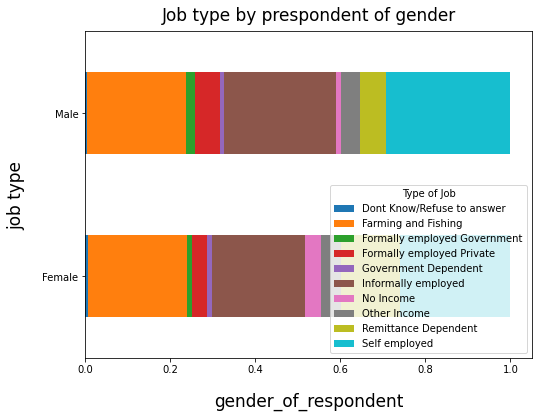

In [ ]:
gend = data.groupby('gender_of_respondent')['Type of Job'].value_counts(normalize=True).unstack()

gend.plot(kind='barh', figsize=(8, 6), stacked=True)
plt.title('Job type by prespondent of gender', fontsize=17, y=1.015)
plt.xlabel('gender_of_respondent', fontsize=17, labelpad=17)
plt.xticks(rotation = 360)
plt.ylabel('job type', fontsize=17, labelpad=17)

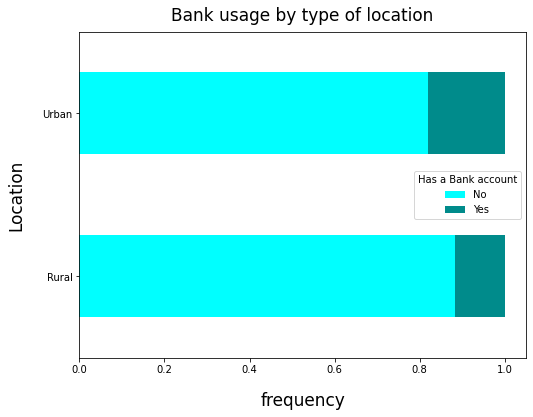

In [ ]:
loc = data.groupby('Type of Location')['Has a Bank account'].value_counts(normalize=True).unstack()

colors= ['cyan', 'darkcyan']

loc.plot(kind='barh', figsize=(8, 6), color=colors, stacked=True)
plt.title('Bank usage by type of location', fontsize=17, y=1.015)
plt.xlabel('frequency', fontsize=17, labelpad=17)
plt.xticks(rotation = 360)
plt.ylabel('Location', fontsize=17, labelpad=17)

plt.show()

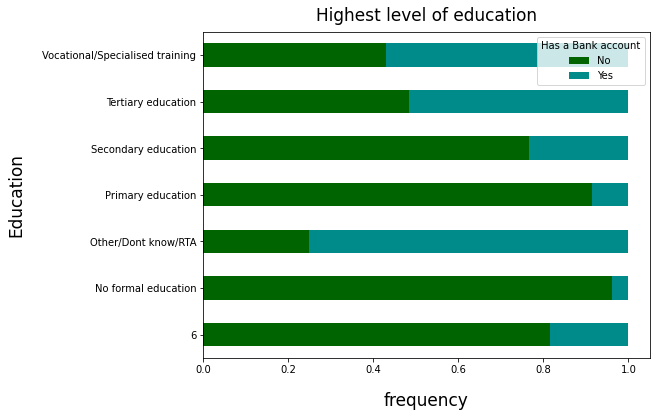

In [ ]:
edu = data.groupby('Level of Educuation')['Has a Bank account'].value_counts(normalize=True).unstack()

colors= ['darkgreen', 'darkcyan']

edu.plot(kind='barh', figsize=(8, 6), color=colors, stacked=True)
plt.title('Highest level of education', fontsize=17, y=1.015)
plt.xlabel('frequency', fontsize=17, labelpad=17)
plt.xticks(rotation = 360)
plt.ylabel('Education', fontsize=17, labelpad=17)

plt.show()

##**Correlation Matrix**

Encoding in order to calculate the correlation matrix

In [ ]:
data["Has a Bank account"] = data["Has a Bank account"].astype('category').cat.codes
data["country"] = data["country"].astype('category').cat.codes
data["Type of Location"] = data["Type of Location"].astype('category').cat.codes
data["Cell Phone Access"] = data["Cell Phone Access"].astype('category').cat.codes
data["gender_of_respondent"] = data["gender_of_respondent"].astype('category').cat.codes
data["Level of Educuation"] = data["Level of Educuation"].astype('category').cat.codes
data["Type of Job"] = data["Type of Job"].astype('category').cat.codes
data["Respondent Age"] = data["Respondent Age"].astype('category').cat.codes
data["uniqueid"] = data["uniqueid"].astype('category').cat.codes
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,0,2018,0,1,0,1,3.0,8,0,4,9
1,0,2018,1111,0,0,0,5.0,54,0,1,4
2,0,2018,2222,1,1,1,5.0,10,1,6,9
3,0,2018,3333,0,0,1,5.0,18,0,3,3
4,0,2018,4444,0,1,0,8.0,10,1,3,5


In [ ]:
data.corr()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
country,1.000000,-0.096297,-0.052727,-0.160926,0.149932,-0.149221,-0.158214,-0.058612,-0.026933,-0.051070,0.379560
year,-0.096297,1.000000,-0.235597,0.112622,0.214621,-0.066637,-0.052484,-0.018554,-0.000024,0.174110,0.266846
uniqueid,-0.052727,-0.235597,1.000000,-0.022791,-0.073196,0.027083,0.026053,0.013789,0.003641,-0.050106,-0.103251
Has a Bank account,-0.160926,0.112622,-0.022791,1.000000,0.088626,0.209512,-0.023056,0.019601,0.116058,0.322847,-0.063150
Type of Location,0.149932,0.214621,-0.073196,0.088626,1.000000,-0.083635,-0.274154,-0.047614,0.013158,0.127290,0.367288
Cell Phone Access,-0.149221,-0.066637,0.027083,0.209512,-0.083635,1.000000,0.098177,-0.103969,0.102176,0.252355,-0.144740
household_size,-0.158214,-0.052484,0.026053,-0.023056,-0.274154,0.098177,1.000000,-0.119671,0.010070,-0.008295,-0.180333
Respondent Age,-0.058612,-0.018554,0.013789,0.019601,-0.047614,-0.103969,-0.119671,1.000000,0.013373,-0.352997,-0.103165
gender_of_respondent,-0.026933,-0.000024,0.003641,0.116058,0.013158,0.102176,0.010070,0.013373,1.000000,0.119366,-0.030374
Level of Educuation,-0.051070,0.174110,-0.050106,0.322847,0.127290,0.252355,-0.008295,-0.352997,0.119366,1.000000,0.044443


 # **c) Multivariate Data Analysis.**

Multivariate analysis - A statistical analysis that involves observation and analysis of more than one statistical outcome variable at a time.

In this section we will checking for relationships between dependent and independent variable. We will also perform the Linear Discriminant Analysis Reduction Technique and then complete by conducting multiple regression analysis.
.

## i) **Principal Component Analysis**

In [ ]:
data.dtypes

country                    int8
year                      int64
uniqueid                  int16
Has a Bank account         int8
Type of Location           int8
Cell Phone Access          int8
household_size          float64
Respondent Age             int8
gender_of_respondent       int8
Level of Educuation        int8
Type of Job                int8
dtype: object

In [ ]:
X = data.drop(['uniqueid','Has a Bank account','Respondent Age','household_size'],axis=1)
y = data['Has a Bank account']

In [ ]:
#Divide the data into test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Perform feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 8.60696907e-01,  2.32953023e-02, -8.04902900e-01, ...,
         1.19939691e+00, -4.42917969e-04, -1.36568935e-01],
       [ 8.60696907e-01,  2.32953023e-02,  1.24238588e+00, ...,
        -8.33752353e-01, -4.42917969e-04,  1.15670615e+00],
       [ 1.93834276e+00,  1.20207548e+00, -8.04902900e-01, ...,
         1.19939691e+00, -4.42917969e-04,  1.15670615e+00],
       ...,
       [-2.16948949e-01, -1.15548487e+00, -8.04902900e-01, ...,
         1.19939691e+00, -4.42917969e-04,  5.10068608e-01],
       [-2.16948949e-01, -1.15548487e+00, -8.04902900e-01, ...,
        -8.33752353e-01,  8.26573514e-01,  5.10068608e-01],
       [-1.29459481e+00,  1.20207548e+00, -8.04902900e-01, ...,
        -8.33752353e-01, -4.42917969e-04, -1.36568935e-01]])

In [ ]:
#Perform PCA using Scikit-Learn
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.25300264, 0.20225084, 0.14938992, 0.13027888, 0.10224098,
       0.09560955, 0.06722719])

In [ ]:
#Train and make predictions using Random forest classifier to evaluate the performance of PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

#Predict the test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


## ii) **Discriminant Analysis**

In [ ]:
X = data.drop(['uniqueid','Has a Bank account','Respondent Age','household_size'],axis=1)
y = data['Has a Bank account']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[7757  273]
 [ 877  429]]
Accuracy0.8768209083119108


In [ ]:
X = data.drop(['year', 'uniqueid','Has a Bank account','Respondent Age','household_size'],axis=1)
y = data['Has a Bank account']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[7889  141]
 [1022  284]]
Accuracy0.8754284490145673


* The Accuracy of the Linear Discriminant lies at 87%
* Most of the variables are not linearly related to the dependent variable.

##**Challenging the solution**

From the analysis done above  using Linear Discriminent analysis the accuracy of the model is 0.8 which shows that the model is a fairly good fit  but could be better with more accurate data to narrow down whether an individual can access a bank account or not.


##**Follow up Questions**

i) Why were there more people in the rural areas who took the survey compared to the urban areas?

ii) The data collected was not significant enough to conclude the analysis. One region has more respondants  than the others. Why?

iii)There are more female rspondants who participated in the survey more than male respondants. Why?

iv) Why was the most basic method of sampling applied for such a survey?

v) What relevance do the relationship with the head of the house have to do with being able to have or access a bank account?


#**Recomendations**

* To create better insight to the data the Survey should be extended and conducted in other neighbouring countries in the Region to allow the researcher to compare the results and more precise conclusions.
* More relevant information such as a valid ID or social security number would have resourceful data to determine whether any of the respondants would have the means of access to a bank account.